## 課題1
[65, 72, 58, 80, 62, 70, 65, 68, 75, 60]

このデータからM-H法を用いて平均μを推定。

標準偏差は10, データは正規分布に従うものとする。

採択率0.4631111111111111
[[67.552  3.16  61.208 73.543]]


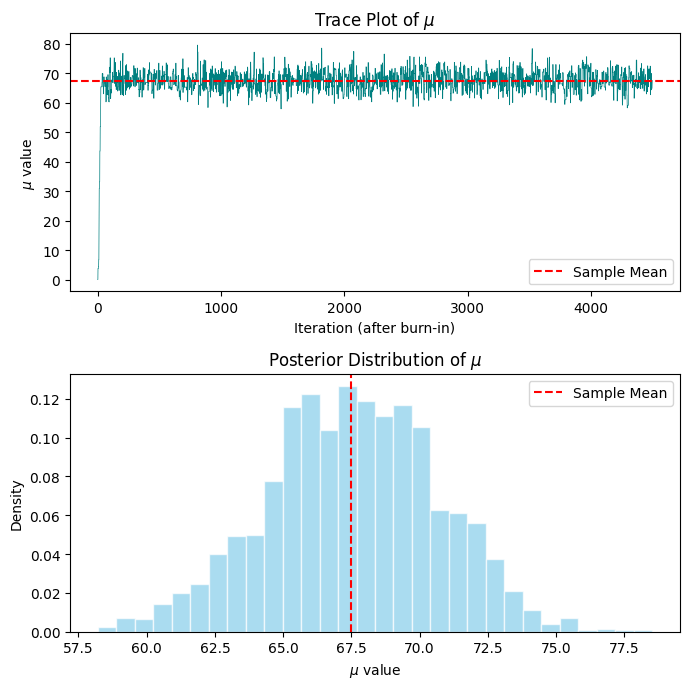

In [71]:
# 課題1
import numpy as np
import math

data = np.array([65, 72, 58, 80, 62, 70, 65, 68, 75, 60])
data


def fLogl(mu, vY):
    fLogl = np.sum( -0.005 * (vY - mu) ** 2 )

    return fLogl


vY = data
mu = 0

dAccept = 0

iBurn = 1500
iDraw = 3000
iIter = iBurn + iDraw
iCount = 0

vPostParam = np.zeros(iDraw)
vParam = np.zeros(iIter)




for it in range(1, iIter + 1):

    iCount += 1

    mu_new = mu + 7.0 * np.random.randn()

    if 0 < mu_new < 100:   
    
        if fLogl(mu_new, vY) - fLogl(mu, vY)  > np.log(np.random.rand()):
            mu = mu_new
            dAccept += 1

    if it > iBurn:
        vPostParam[it - iBurn - 1] = mu
    vParam[it - 1]  = mu

print(f"採択率{dAccept/iCount}")
mean = vPostParam.mean( axis = 0 )
sd   = vPostParam.std( axis = 0, ddof = 1 )
q025 = np.quantile( vPostParam, 0.025, axis = 0 )
q975 = np.quantile( vPostParam, 0.975, axis = 0 )

res = np.column_stack([mean, sd, q025, q975])
print( np.round( res, 3 ) )

import matplotlib.pyplot as plt



# グラフの土台（横に長い1枚の画像）を作成
plt.figure(figsize=(7, 7))

# --- 左側：トレースプロット (時系列グラフ) ---
# 1行2列の1番目
plt.subplot(2, 1, 1)
plt.plot(vParam, lw=0.5, color='teal')
plt.axhline(np.mean(data), color='red', linestyle='--', label="Sample Mean")
plt.title("Trace Plot of $\mu$")
plt.xlabel("Iteration (after burn-in)")
plt.ylabel("$\mu$ value")
plt.legend()

# --- 右側：ヒストグラム ---
# 1行2列の2番目
plt.subplot(2, 1, 2)
plt.hist(vPostParam, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='white')
plt.axvline(np.mean(data), color='red', linestyle='--', label="Sample Mean")
plt.title("Posterior Distribution of $\mu$")
plt.xlabel("$\mu$ value")
plt.ylabel("Density")
plt.legend()

# 重なりを防いで綺麗に表示
plt.tight_layout()
plt.show()

/tmp/ipykernel_32016/1951114452.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(vPostParam, labels=[r"$\mu$"])
/tmp/ipykernel_32016/1951114452.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[r"$\mu$"])


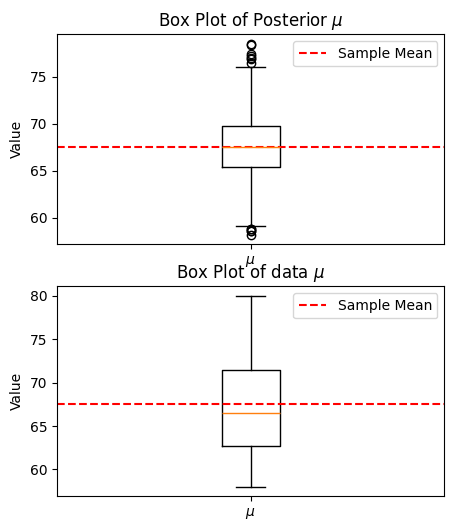

In [72]:
plt.figure(figsize=(5, 6))

# 箱ひげ図の描画
plt.subplot(2, 1, 1)
plt.boxplot(vPostParam, labels=[r"$\mu$"])

# 比較用に標本平均の線を引く
plt.axhline(np.mean(data), color='red', linestyle='--', label="Sample Mean")

plt.title("Box Plot of Posterior $\mu$")
plt.ylabel("Value")
plt.legend()


plt.subplot(2, 1, 2)
plt.boxplot(data, labels=[r"$\mu$"])
plt.axhline(np.mean(data), color='red', linestyle='--', label="Sample Mean")

plt.title("Box Plot of data $\mu$")
plt.ylabel("Value")
plt.legend()

plt.show()